# Fashion MNIST

Fashion MNIST is a dataset widely used in the field of machine learning and computer vision. It serves as a benchmark for testing and evaluating various image classification algorithms.

Inspired by the classic MNIST dataset, which consists of handwritten digits, Fashion MNIST contains grayscale images of clothing items such as t-shirts, trousers, dresses, coats, and sandals. Each image is a 28x28 pixel array, totaling 784 pixels, and is associated with a specific label indicating the type of clothing it represents.

With 10 categories in total, Fashion MNIST provides a more challenging classification task compared to MNIST, making it suitable for testing the robustness and performance of machine learning models. 

The dataset's simplicity and accessibility have made it a popular choice for beginners and researchers alike, serving as a starting point for exploring image classification techniques and algorithms.

We are going to train a simple 2 hidden dense layers neural network on this dataset using TensorFlow Keras API and see what results we can get. 

## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras as k

# Download and Load Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train set shape:', train_images.shape, 'test set shape:', test_images.shape)

train set shape: (60000, 28, 28) test set shape: (10000, 28, 28)


Loading the dataset returns four NumPy arrays:

- The train_images and train_labels arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.
  
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Preprocessing

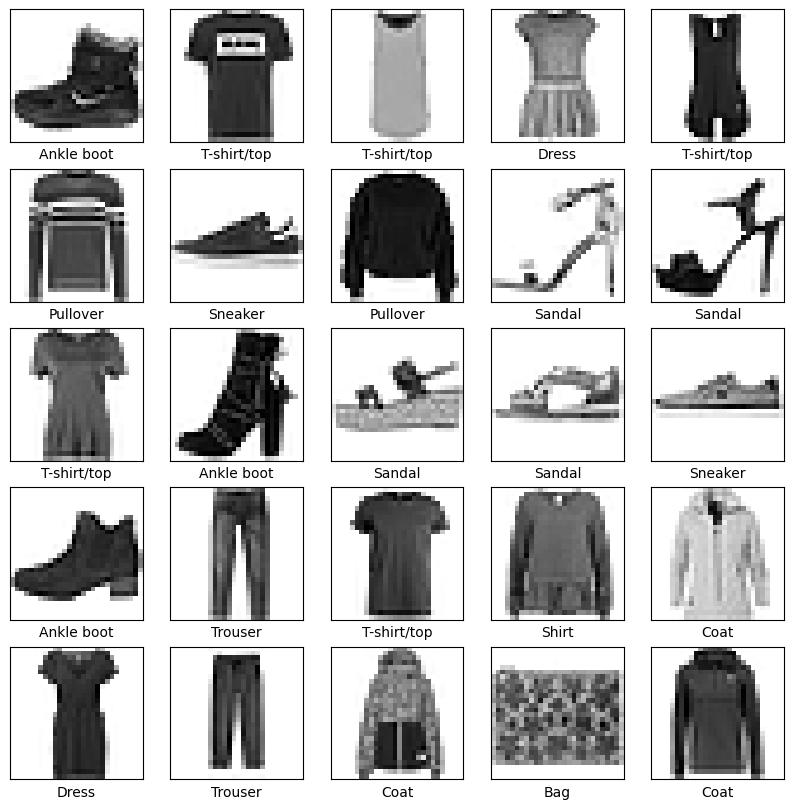

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Feature Scaling

In [5]:
# Min-Max scale to (0, 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_images.shape

(60000, 28, 28)

### Label Encoding

Fashion MNIST dataset consists of various categories of clothing items, each represented by a unique label. When encoding these labels, one hot encoding is preferred over label encoding due to its ability to capture the categorical nature of the data more effectively. 

One hot encoding represents each category as a binary vector, where only one element is hot (1) indicating the presence of that category, while all other elements are cold (0). This encoding scheme preserves the categorical distinction between different classes without imposing any ordinal relationship, which might not be appropriate for fashion categories where there is no inherent order.

In contrast, label encoding assigns unique numerical labels to each category, potentially introducing ordinality where none exists and leading to misinterpretation of the data by machine learning algorithms.

Therefore, for fashion MNIST dataset, one hot encoding ensures that the model can treat each category equally and independently, making it a more suitable choice for classification tasks.


**1. Label Encoding:**

Label encoding assigns a unique integer to each category, ranging from 0 to n_classes - 1.

| Category    | Label |
|-------------|-------|
| T-shirt     | 0     |
| Trouser     | 1     |
| Dress       | 2     |
| Coat        | 3     |
| Sandal      | 4     |

**2. One-Hot Encoding:**

One-hot encoding represents each category as a binary vector where only one bit is hot (1), indicating the presence of that category.

| Category    | One hot vector |
|-------------|----------------|
| T-shirt     | 1 0 0 0 0      |
| Trouser     | 0 1 0 0 0      |
| Dress       | 0 0 1 0 0      |
| Coat        | 0 0 0 1 0      |
| Sandal      | 0 0 0 0 1      |



In [7]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [8]:
print(train_labels.shape)

(60000, 10)


## Defining the Model

### Sequential API

This is the simplest model building option. When building a model, you start from the input to the output, no other way around. This API is suited for tasks that don't require multiple inputs or outputs, or skip connections.

Sequential API can be a good API to use for things like image classification or regression tasks. With things like object detection and segmentation, we need another API, which is Functional API.

In [9]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


In [10]:

## Instantiate model
model = k.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10)
])

### Functional API (Not Required)

This type of API makes it easy to build models that can take multiple inputs/outputs, or skip connections.

It is well suited in advanced things like object detection and segmentation. In object detection, there are two main involved things.

One is recognizing the object(classification) and other is localizing the object(regression: predicting the bounding boxes coordinates).

<div style="border: 1px solid black; padding: 5px;">

```python
inputs = keras.Input()
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(16, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, output)
```

## Getting the Model Ready For Training

Before we can train our model we need to set the parameters we are going to use to train it. We can configure our model for training using the `.compile` method. The main parameters we need to specify in the `.compile` method are:

**Optimizer:** The algorithm that we'll use to update the weights of our model during training. Throughout these lessons we will use the adam optimizer. Adam is an optimization of the stochastic gradient descent algorithm. For a full list of the optimizers available in tf.keras check out the optimizers documentation.

**Loss Function:** The loss function we are going to use during training to measure the difference between the true labels of the images in your dataset and the predictions made by your model. In this lesson we will use the sparse_categorical_crossentropy loss function. We use the sparse_categorical_crossentropy loss function when our dataset has labels that are integers, and the categorical_crossentropy loss function when our dataset has one-hot encoded labels. For a full list of the loss functions available in tf.keras check out the losses documentation.

**Metrics:** A list of metrics to be evaluated by the model during training. Throughout these lessons we will measure the accuracy of our model. The accuracy calculates how often our model's predictions match the true labels of the images in our dataset. For a full list of the metrics available in tf.keras check out the metrics documentation.

These are the main parameters we are going to set throught these lesson. You can check out all the other configuration parameters in the TensorFlow documentation

In [11]:
model.compile(loss=k.losses.CategoricalCrossentropy(from_logits=True),
              # optimizer=k.optimizers.SGD(),
              optimizer=k.optimizers.Adam(),
              metrics = [k.metrics.CategoricalAccuracy()])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [84]:
history=model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 13s 5ms/step - loss: 0.5005 - categorical_accuracy: 0.8231 - val_loss: 0.4509 - val_categorical_accuracy: 0.8346
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3769 - categorical_accuracy: 0.8644 - val_loss: 0.4065 - val_categorical_accuracy: 0.8514
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390 - categorical_accuracy: 0.8752 - val_loss: 0.3592 - val_categorical_accuracy: 0.8691
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3144 - categorical_accuracy: 0.8845 - val_loss: 0.3687 - val_categorical_accuracy: 0.8699
Epoch 5/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2961 - categorical_accuracy: 0.8909 - val_loss: 0.3494 - val_categorical_accuracy: 0.8707
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2835 - categorical_accuracy: 0.8956 - val_loss: 0.3330 - val_categorical_accuracy

<Axes: >

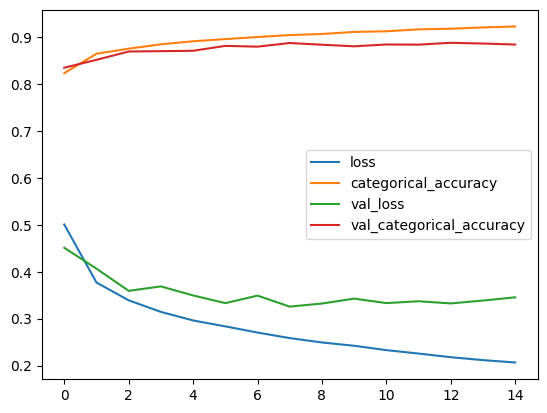

In [90]:
import pandas as pd 
hist_df = pd.DataFrame(history.history)
hist_df.plot()

In [91]:
model.save('tests\\fashion_mnist.h5')

In [92]:
# Load the saved model
# loaded_model = tf.keras.models.load_model('tests\\fashion_mnist.h5')

## Test predictions

In [93]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

1/1 [==============================] - 0s 28ms/step
tshirt.png --> T-shirt/top (0)
1/1 [==============================] - 0s 26ms/step
pants.png --> Shirt (6)
1/1 [==============================] - 0s 32ms/step
pyjamas.jpg --> Trouser (1)
1/1 [==============================] - 0s 34ms/step
ankle boot.jpg --> Ankle boot (9)
1/1 [==============================] - 0s 27ms/step
heels.jpg --> Sandal (5)
1/1 [==============================] - 0s 47ms/step
sneakers.jpg --> Sneaker (7)
1/1 [==============================] - 0s 39ms/step
sneakers2.jpg --> Sandal (5)
1/1 [==============================] - 0s 51ms/step
coat.jpg --> Pullover (2)
1/1 [==============================] - 0s 39ms/step
coat2.jpg --> Coat (4)


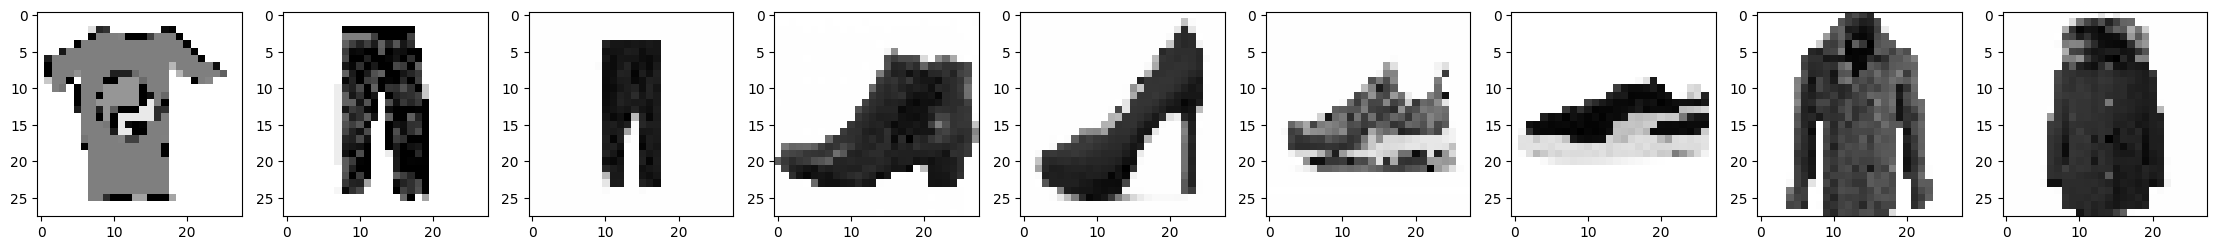

In [99]:
internet_images = ['tshirt.png', 'pants.png', 'pyjamas.jpg', 'ankle boot.jpg', 'heels.jpg', 'sneakers.jpg', 'sneakers2.jpg', 'coat.jpg', 'coat2.jpg']

figure, ax = plt.subplots(1, len(internet_images), figsize=(28, 28))

for index, image in enumerate(internet_images):

    image_data = cv2.imread('tests/'+image, cv2.IMREAD_GRAYSCALE)
    # resize image to match model input dimensions
    image_data = cv2.resize(image_data, (28, 28))

    ax[index].imshow(image_data, cmap='gray')   
    image_data = (255 - image_data) / 255.0
    image_data = np.expand_dims(image_data,0)
    prediction = probability_model.predict(image_data)
    predicted_class_index = np.argmax(prediction)
    prediction = class_names[predicted_class_index]
    print(image, '-->', prediction, f'({predicted_class_index})')

## AutoDiff

Let's now take a minute to see how TensorFlow calculates and keeps track of the gradients needed for backpropagation. TensorFlow provides a class that records automatic differentiation operations, called `tf.GradientTape`. Automatic differentiation, also known as algorithmic differentiation or simply “autodiff”, is a family of techniques used by computers for efficiently and accurately evaluating derivatives of numeric functions.

tf.GradientTape works by keeping track of operations performed on tensors that are being "watched". By default tf.GradientTape will automatically "watch" any trainable variables, such as the weights in our model. When we create a model with `tf.keras`, all of the parameters are initialized with to be trainable but we can set them to static to not update them. Any tensor can also be manually "watched" by invoking the watch method.

Let's see a simple example. Let's take the following equation:

$$y = x^2$$

The derivative of y with respect to x is given by:

$$ \frac{dy}{dx} = 2x$$

Now, let's use `tf.GradientTape` to calculate the derivative of a tensor y with respect to a tensor x:

In [ ]:

# Set the random seed so things are reproducible
tf.random.set_seed(7)

# Create a random tensor
x = tf.random.normal((2,2))

# Calculate gradient
with tf.GradientTape() as g:
    g.watch(x)
    y = x ** 2
    
dy_dx = g.gradient(y, x)

# Calculate the actual gradient of y = x^2
true_grad = 2 * x

# Print the gradient calculated by tf.GradientTape
print('Gradient calculated by tf.GradientTape:\n', dy_dx)

# Print the actual gradient of y = x^2
print('\nTrue Gradient:\n', true_grad)

# Print the maximum difference between true and calculated gradient
print('\nMaximum Difference:', np.abs(true_grad - dy_dx).max())

The `tf.GradientTape` class keeps track of these operations and knows how to calculate the gradient for each one. In this way, it's able to calculate the gradients for a chain of operations, with respect to any one tensor.